<a href="https://colab.research.google.com/github/dbetanc1/MAT421/blob/main/HW_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Central Limit Theorem —
Explained with Examples

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

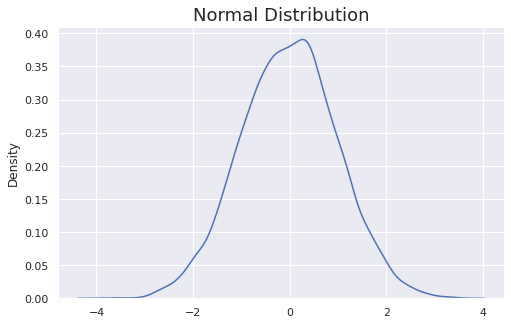

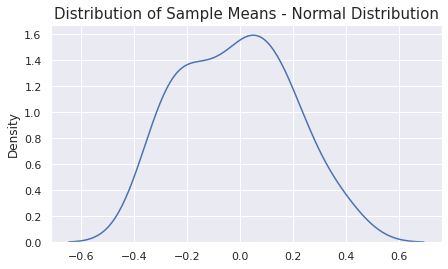

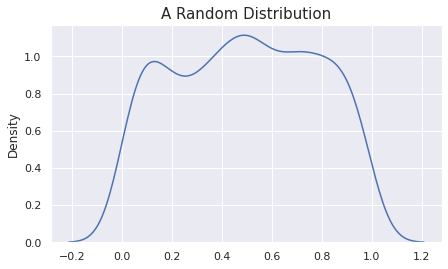

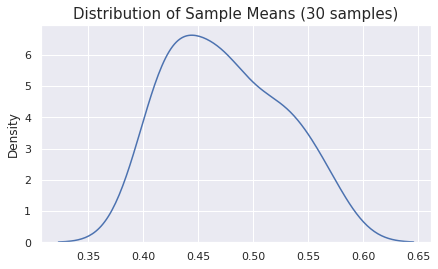

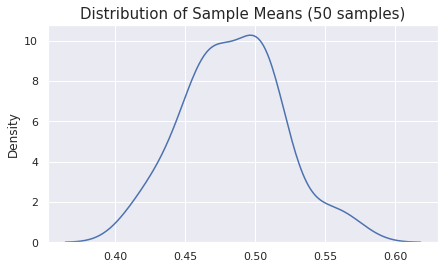

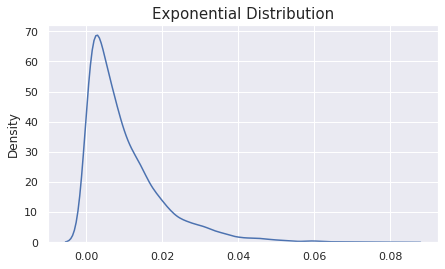

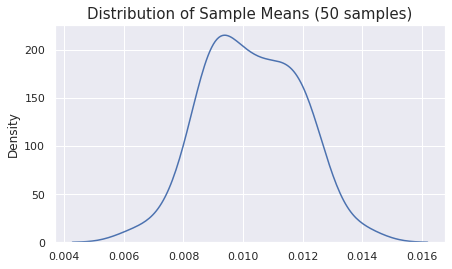

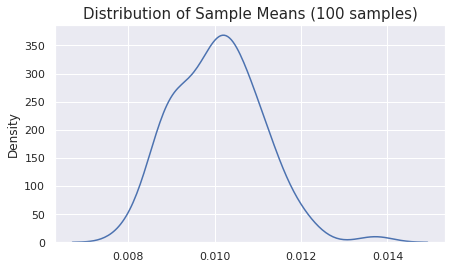

In [ ]:
#Examples to prove CLT

import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

%matplotlib inline

#define a funtion that creates random distribution sample
def random_samples(population, sample_qty, sample_size): 
    sample_means = [] 
    for i in range(sample_qty): 
        sample = population.sample(n=sample_size) 
        sample_mean = np.array(sample).mean() 
        sample_means.append(sample_mean) 
    return sample_means

#input a population with normal distribution

norm = list(np.random.randn(10000)) 
plt.figure(figsize=(8,5)) 
plt.title("Normal Distribution", fontsize=18) 
sns.distplot(norm, hist=False)

#take 30 samples and each sample includes 30 values.
#Please note that we need to convert the population to pandas series
#because sample function will not accept numpy arrays.

population = pd.Series(norm) 
samples_from_normal = random_samples(population, 30, 30) 
plt.figure(figsize=(7,4)) 
plt.title("Distribution of Sample Means - Normal Distribution", 
fontsize=15) 
sns.distplot(samples_from_normal, hist=False)

#same procedure to a population with random distribution
#create an array with 1000 random numbers

random = np.random.random(1000) 
plt.figure(figsize=(7,4)) 
plt.title("A Random Distribution", fontsize=15) 
sns.distplot(random, hist=False)

#how sampling distribution will look like with 30 samples with 30 values each

population = pd.Series(random) 
samples_from_normal = random_samples(population, 30, 30) 
plt.figure(figsize=(7,4)) 
plt.title("Distribution of Sample Means (30 samples)", fontsize=15) 
sns.distplot(samples_from_normal, hist=False)

#It is getting close to a normal distribution. We now try with 50 samples and
#also increase the sample size to 50:

population = pd.Series(random) 
samples_from_normal = random_samples(population, 50, 50) 
plt.figure(figsize=(7,4)) 
plt.title("Distribution of Sample Means (50 samples)", fontsize=15) 
sns.distplot(samples_from_normal, hist=False)

#exponential distribution
exp = np.random.exponential(0.01, 5000) 
plt.figure(figsize=(7,4)) 
plt.title("Exponential Distribution", fontsize=15) 
sns.distplot(exp, hist=False)

#If we randomly take 50 samples with a size of 50, the distribution of the
#sample means look like:
population = pd.Series(exp) 
samples_from_normal = random_samples(population, 50, 50) 
plt.figure(figsize=(7,4)) 
plt.title("Distribution of Sample Means (50 samples)", fontsize=15) 
sns.distplot(samples_from_normal, hist=False)

#It looks more like a normal distribution than an exponential distribution.
#With 100 samples, normality is more prominent:

population = pd.Series(exp) 
samples_from_normal = random_samples(population, 100, 100) 
plt.figure(figsize=(7,4)) 
plt.title("Distribution of Sample Means (100 samples)", fontsize=15) 
sns.distplot(samples_from_normal, hist=False)

Calculating Pearson CorrelationCoefficient in Python with Numpy

In [ ]:
#First, let's import the  numpy  module, alongside the  pyplot  module from Matplotlib. 
#We'll be using Matplotlib to visualize the correlation later on:

import numpy as np
import matplotlib.pyplot as plt

#Store values into  x_simple  and compute the correlation matrix:

x_simple = np.array([-2, -1, 0, 1, 2])
y_simple = np.array([4, 1, 3, 2, 0])
my_rho = np.corrcoef(x_simple, y_simple)

print(my_rho)

[[ 1.  -0.7]
 [-0.7  1. ]]


In [ ]:
#Positive and Negative Correlation Examples
#We'll use a  seed  so that this example is repeatable when calling the  RandomState  from Numpy:
seed = 13 
rand = np.random.RandomState(seed) 
 
x = rand.uniform(0,1,100) 
x = np.vstack((x,x*2+1)) 
x = np.vstack((x,-x[0,]*2+1)) 
x = np.vstack((x,rand.normal(1,3,100)))

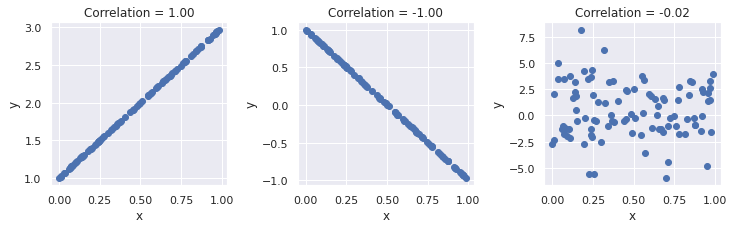

In [ ]:

rho = np.corrcoef(x) 
 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3)) 
for i in [0,1,2]: 
    ax[i].scatter(x[0,],x[1+i,]) 
    ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1])) 
    ax[i].set(xlabel='x',ylabel='y') 
fig.subplots_adjust(wspace=.4)     
plt.show() 

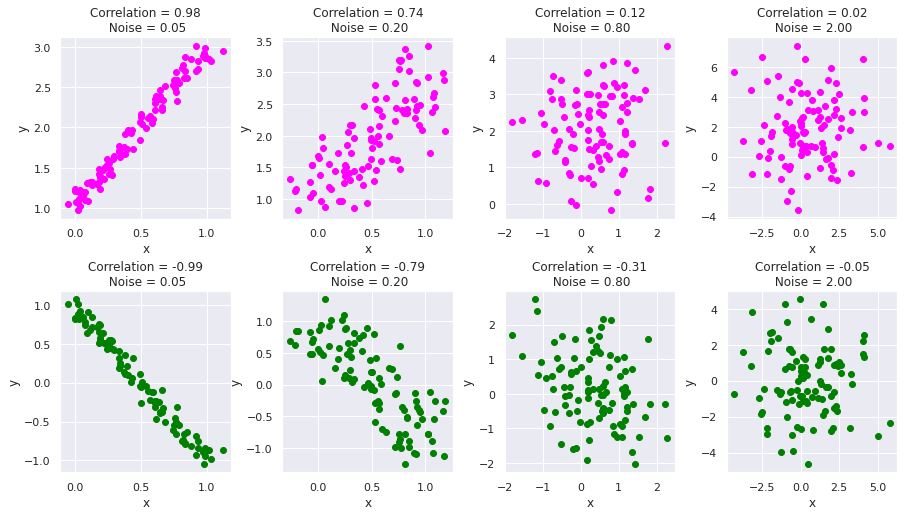

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 8)) 
 
for noise, i in zip([0.05,0.2,0.8,2],[0,1,2,3]): 
    # Add noise 
    x_with_noise = x+rand.normal(0,noise,x.shape) 
     
    # Compute correlation 
    rho_noise = np.corrcoef(x_with_noise) 
     
    # Plot column wise. Positive correlation in row 0 and negative in row 1 
    ax[0,i].scatter(x_with_noise[0,],x_with_noise[1,],color='magenta') 
    ax[1,i].scatter(x_with_noise[0,],x_with_noise[2,],color='green') 
    ax[0,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,1]) 
                        + '\n Noise = ' + "{:.2f}".format(noise) ) 
    ax[1,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,2]) 
                        + '\n Noise = ' + "{:.2f}".format(noise)) 
    ax[0,i].set(xlabel='x',ylabel='y')     
    ax[1,i].set(xlabel='x',ylabel='y') 
     
fig.subplots_adjust(wspace=0.3,hspace=0.4)     
plt.show() 

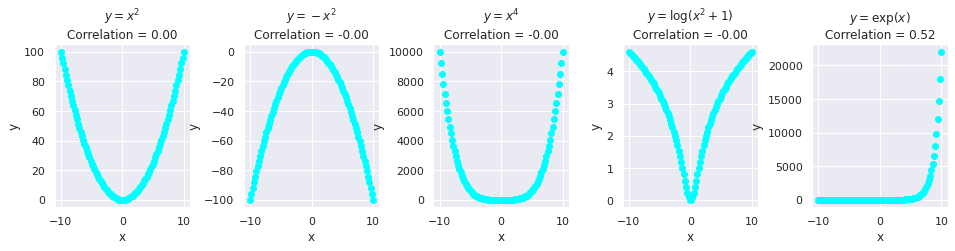

In [ ]:
# Create a data matrix 
x_nonlinear = np.linspace(-10,10,100) 
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear*x_nonlinear)) 
x_nonlinear = np.vstack((x_nonlinear,-x_nonlinear[0,]**2)) 
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear[0,]**4)) 
x_nonlinear = np.vstack((x_nonlinear,np.log(x_nonlinear[0,]**2+1))) 
x_nonlinear = np.vstack((x_nonlinear,np.exp(x_nonlinear[0,]))) 
 
# Compute the correlation 
rho_nonlinear = np.corrcoef(x_nonlinear) 
 
# Plot the data 
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 3)) 
title = ['$y=x^2$','$y=-x^2$','$y=x^4$','$y=\log(x^2+1)$','$y=\exp(x)$'] 
for i in [0,1,2,3,4]: 
    ax[i].scatter(x_nonlinear[0,],x_nonlinear[1+i,],color='cyan') 
    ax[i].title.set_text(title[i] + '\n' +  
                         'Correlation = ' + "{:.2f}".format(rho_nonlinear[0,i+1])) 
    ax[i].set(xlabel='x',ylabel='y') 
    fig.subplots_adjust(wspace=.4)     
plt.show() 